In [1]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading datset
dataset = pd.read_csv('winequality-red.csv')

In [3]:
print(dataset.shape)
dataset.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.isnull().any()

fixed acidity            True
volatile acidity         True
citric acid              True
residual sugar           True
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                  True
quality                 False
dtype: bool

In [5]:
#to fill missing value with median strategy
dataset['fixed acidity'].fillna(dataset['fixed acidity'].median(), inplace=True)
dataset['volatile acidity'].fillna(dataset['volatile acidity'].median(), inplace=True)
dataset['citric acid'].fillna(dataset['citric acid'].median(), inplace=True)
dataset['residual sugar'].fillna(dataset['residual sugar'].median(), inplace=True)
dataset['alcohol'].fillna(dataset['alcohol'].median(), inplace=True)

In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319700,0.527777,0.271138,2.534615,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.424234,5.636023
std,1.741079,0.179053,0.194683,1.404735,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.064817,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
duplicate_rows = dataset[dataset.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"\nNumber of Duplicate Rows: {num_duplicate_rows}")


Number of Duplicate Rows: 240


In [8]:
# delete one of duplicate and keep the other one
dataset = dataset.drop_duplicates(keep='first')

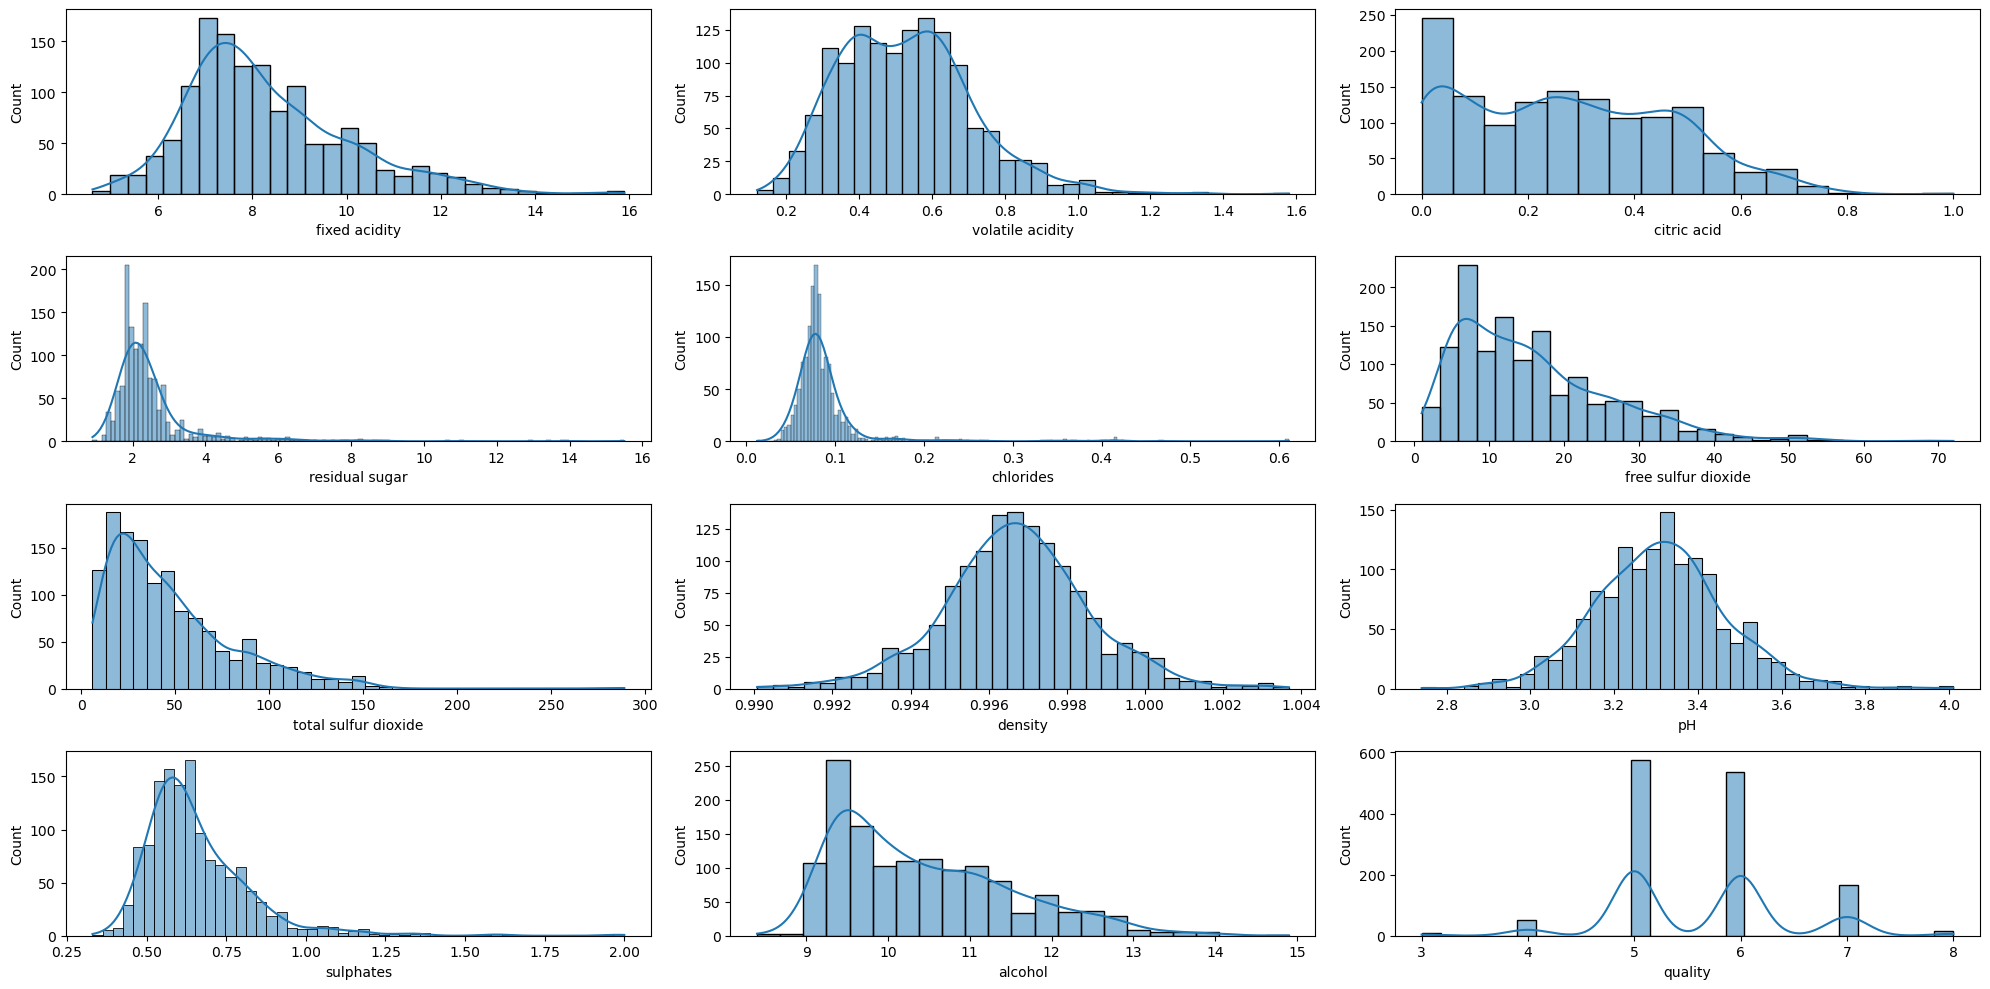

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_feature = plt.figure(figsize=[20, 10])
feature = dataset.columns
cnt = 1
for i in feature:
    plt.subplot(4, 3, cnt)
    sns.histplot(dataset[i], kde=True)
    cnt += 1
plt.tight_layout()
plt.show()

In [10]:
#finding ouliers
from scipy import stats
for column_name in dataset.columns:
    z_scores = stats.zscore(dataset[column_name])
    outliers = (np.abs(z_scores) > 3)
    num_outliers = np.sum(outliers)
    print(f"Column: {column_name}, Number of Outliers: {num_outliers}")

Column: fixed acidity, Number of Outliers: 9
Column: volatile acidity, Number of Outliers: 9
Column: citric acid, Number of Outliers: 1
Column: residual sugar, Number of Outliers: 28
Column: chlorides, Number of Outliers: 27
Column: free sulfur dioxide, Number of Outliers: 18
Column: total sulfur dioxide, Number of Outliers: 12
Column: density, Number of Outliers: 13
Column: pH, Number of Outliers: 8
Column: sulphates, Number of Outliers: 21
Column: alcohol, Number of Outliers: 7
Column: quality, Number of Outliers: 10


Text(0.5, 1.0, 'Correlation Matrix')

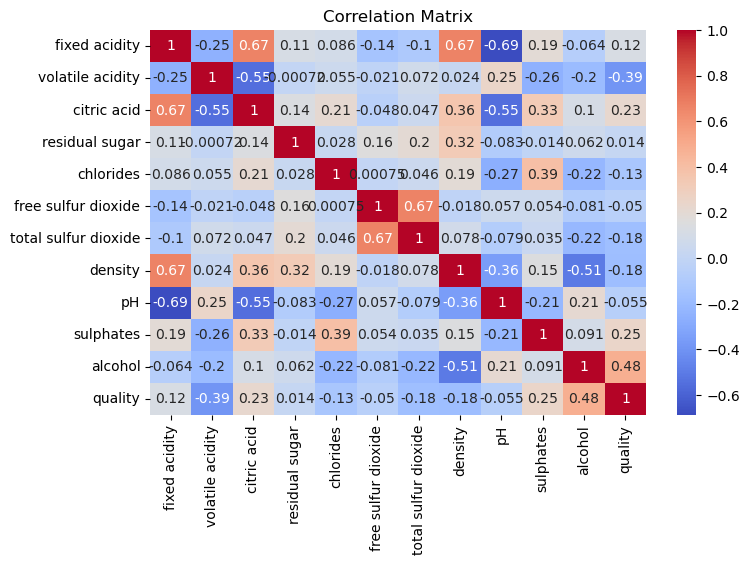

In [11]:
# to see the correlation between variables
correlation_matrix = dataset.corr()
plt.figure(figsize=(8, 5))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [12]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

X = dataset.drop('quality', axis=1)
y = dataset['quality']
classifier = KNeighborsClassifier()

thresholds = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]

mean_scores = []

# Use f1_macro as the scoring metric
scorer = make_scorer(f1_score, average='macro')

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    X_high_variance = selector.fit_transform(X)
    scores = cross_val_score(classifier, X_high_variance, y, cv=5, scoring=scorer)
    mean_scores.append(np.mean(scores))

optimal_threshold = thresholds[np.argmax(mean_scores)]
print("Optimal Threshold:", optimal_threshold)


Optimal Threshold: 0.01


In [13]:
# Use VarianceThreshold to remove low variance features
threshold = 0.01  # You can adjust this threshold based on your preference
selector = VarianceThreshold(threshold=threshold)
X_high_variance = selector.fit_transform(X)

# Get the columns selected by the variance threshold
selected_columns = X.columns[selector.get_support()]

# Get the names of removed columns
removed_columns = X.columns.difference(selected_columns)

# Display the names of removed columns
print("Columns removed due to low variance:")
print(removed_columns)

Columns removed due to low variance:
Index(['chlorides', 'density'], dtype='object')


In [14]:
columns_to_remove = ['chlorides', 'density']
df = dataset.drop(columns=columns_to_remove)

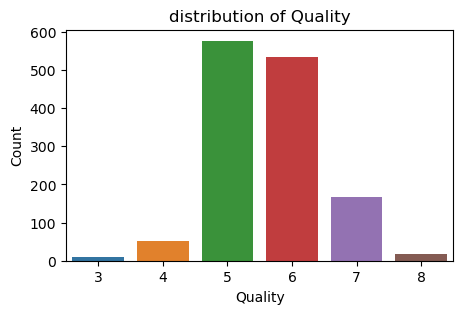

Percentage of each unique value in the 'quality' column:
5    42.457689
6    39.367182
7    12.288447
4     3.899926
8     1.250920
3     0.735835
Name: quality, dtype: float64


In [15]:
plt.figure(figsize=(5, 3))
sns.countplot(x='quality', data=df)
plt.title('distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()
quality_percentages = df['quality'].value_counts(normalize=True) * 100
print("Percentage of each unique value in the 'quality' column:")
print(quality_percentages)

In [16]:
#fix unbalancing 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 6 else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train_oversampled)
X_test_s=sc.transform(X_test)

In [18]:
# find best number of neighbors from 1 to 50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score  
k_values = [i for i in range(1, 50)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))
optimal_k = k_values[np.argmax(scores)]
print("Optimal number of neighbors:", optimal_k)

Optimal number of neighbors: 23


Text(0.5, 1.0, 'accuracy base on number of neighbors')

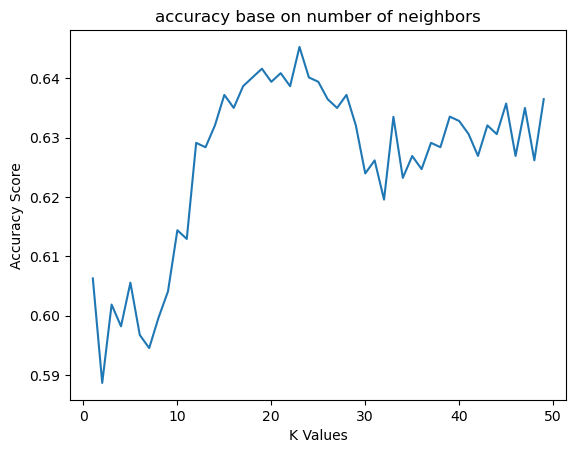

In [19]:
#plot best number of neighbors
sns.lineplot(x = k_values, y = scores)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title("accuracy base on number of neighbors")

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'metric': ['euclidean', 'manhattan', 'chebyshev']}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_s, y_train_oversampled)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan'}


In [21]:
# using the KNN classification metheod
classifier = KNeighborsClassifier(n_neighbors=23, metric='manhattan', p=2)
classifier.fit(X_train_s, y_train_oversampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=23)

In [22]:
# predict based on the test
y_pred = classifier.predict(X_test_s)

In [23]:
#create a prediction
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.75
Confusion Matrix:
 [[102  33]
 [ 35 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       135
           1       0.76      0.74      0.75       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



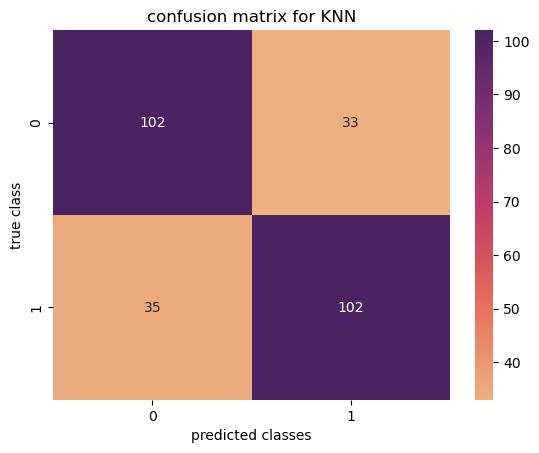

In [24]:
# confusion matrix
ax = sns.heatmap(confusion, cmap='flare', annot=True, fmt='d')
plt.xlabel('predicted classes')  
plt.ylabel('true class')  
plt.title('confusion matrix for KNN')
plt.show()

In [25]:
#decision tree 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_s, y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [26]:
# predict based on the test section
y_pred = classifier.predict(X_test_s)

In [27]:
#evaluating model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [28]:
# print result
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 0.7022058823529411

Confusion Matrix:
 [[ 86  49]
 [ 32 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68       135
           1       0.68      0.77      0.72       137

    accuracy                           0.70       272
   macro avg       0.71      0.70      0.70       272
weighted avg       0.71      0.70      0.70       272



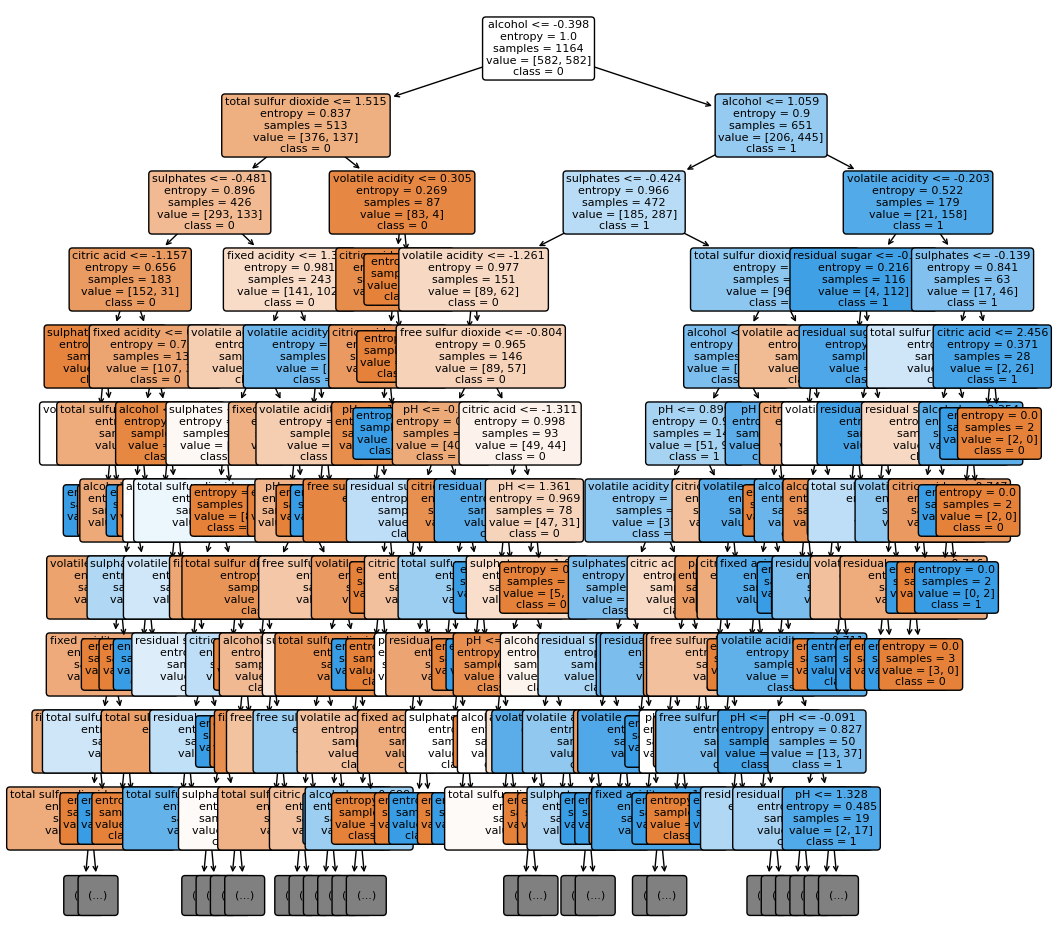

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(classifier, max_depth=10, filled=True, feature_names=X_train.columns.tolist(),
          class_names=['0', '1'], rounded=True, ax=ax, fontsize=8)
plt.show()


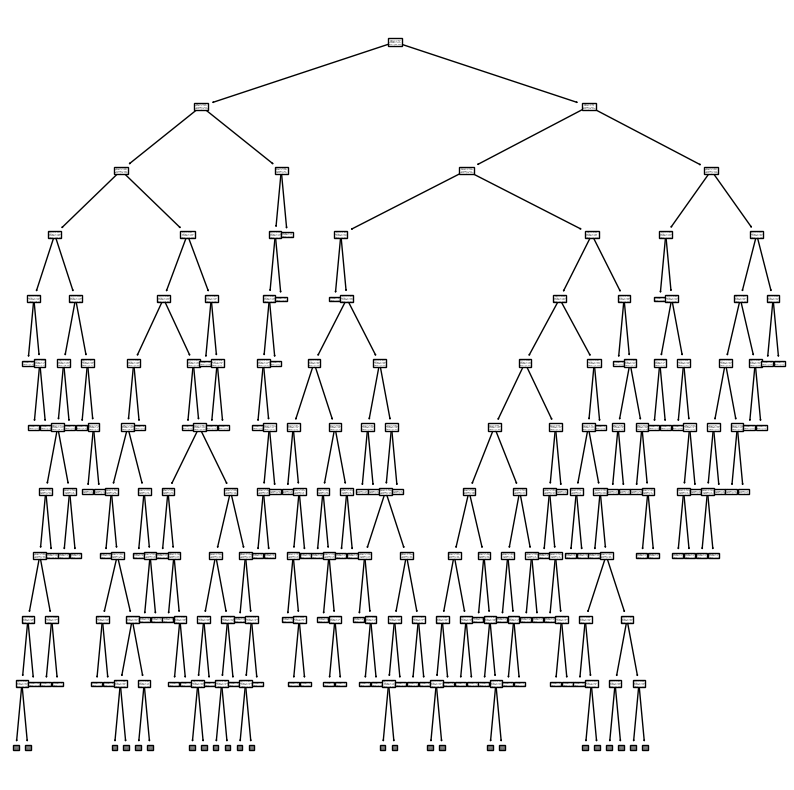

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
fig = plt.figure(figsize=(10, 10))
plot_tree(classifier, max_depth=10)
plt.show()